# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import scipy
import seaborn as sns

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of body temperatures normal?¶


Firs, lets sort the data according to temperature from the table

In [4]:
sorted_t = df['temperature'].sort_values()
sorted_t.head()

125    96.3
39     96.4
11     96.7
105    96.7
95     96.8
Name: temperature, dtype: float64

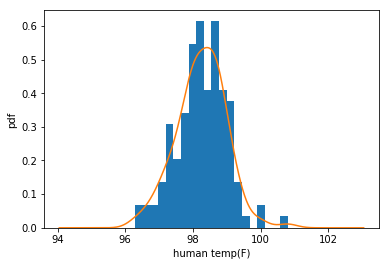

In [5]:
plt.hist(df.temperature,bins = 20, density = True)
df.temperature.plot(kind='kde')
plt.xlabel('human temp(F)')
plt.ylabel('pdf')
plt.show()

In [6]:

# function for  CDF

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

## 1.) Is the distribution of body temperatures normal?¶

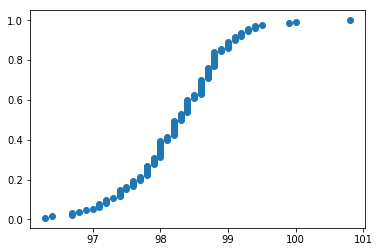

In [7]:
x, y = ecdf(df.temperature)
plt.plot(x, y,marker = 'o',linestyle = 'none')
plt.show()

As seen from the graphs of pdf and cdf,although there are some gaps and outliers, data seems to be distributed normally. 

## 2) Is the sample size large? Are the observations independent?¶

The dataset has 130 data points, it looks large enough regarding the size. The observations are also independent.

## 3) Is the true population mean really 98.6 degrees F?¶

We should try hyposthesis tests in order to find the answer. The null hypothesis: the mean population is 98.6F. it is appropriate to use the t statistic as the sample standard deviation is not known. On the other hand, sample size is big enough to use a z test. We dont know the standart deviation of the population. 

In [8]:
from statsmodels.stats.weightstats import ztest

In [9]:
pmean = 98.6 
t_score, p_value = stats.ttest_1samp(df.temperature, pmean, axis=0)
print("t_score:", t_score, 'p-value:',p_value)

t_score: -5.4548232923645195 p-value: 2.4106320415561276e-07


In [10]:

z_score, p_value = ztest(x1= df.temperature, x2=None, value=pmean, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p_value:',p_value)

z_score: -5.4548232923645195 p_value: 4.9021570141012155e-08


The results of t test and z test are the same. P value for the t test is smaller.

In [11]:

stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

p-value < 0.05, we can reject the null hypothesis.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.¶

In [12]:
# we can use a random generator
rand_temp=np.random.choice(df.temperature, size=10)
print(rand_temp)

[97.1 99.4 99.1 97.4 98.5 98.4 98.4 98.8 99.  97.8]


In [13]:
t_score, pValue = stats.ttest_1samp(rand_temp, pmean, axis=0)
print("t_score:", t_score, 'p-value:', pValue)
z_score, pValue = ztest(x1= rand_temp, x2=None, value=pmean, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

t_score: -0.8848698624688122 p-value: 0.3992498003021293
z_score: -0.8848698624688122 p-value: 0.3762268241481814


z-test gives lower p-value, with more statiscal significance reject the null hypothesis that the normal body temperature is 98.6F.

## 5. Confidence interval, choosing 99% significance level 

In [14]:
import statsmodels.stats.api as sms

In [15]:
print('99% Conf Int:',sms.DescrStatsW(df.temperature).tconfint_mean(alpha=0.01))

99% Conf Int: (98.08110824239758, 98.41735329606395)


from the sample data, the 99% confidence interval is (98.08110824239758, 98.41735329606395) for normal temperature.

## Q6 Difference between females and males?

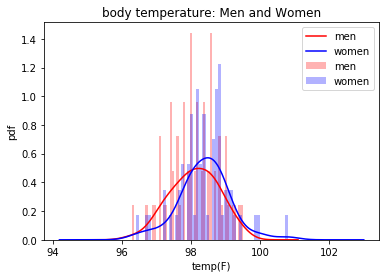

In [16]:
men = df[df.gender == 'M']
women = df[df.gender == 'F']
men.temperature.plot(kind='hist', bins=50, color = 'red', density= True,label= 'men', alpha = 0.3)
men.temperature.plot(kind='kde',color = 'red', label= 'men' )
women.temperature.plot(kind='hist', bins=50, color = 'blue', density= True, label= 'women',alpha = 0.3)
women.temperature.plot(kind='kde',color = 'blue',label = 'women')
plt.legend(loc='upper right')
plt.title('body temperature: Men and Women')
plt.xlabel('temp(F)')
plt.ylabel('pdf')
plt.show()

In [17]:
z_score, pValue = ztest(x1= men.temperature, x2=women.temperature, value=0, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

z_score: -2.2854345381656103 p-value: 0.02228736076065755


it can be seen that men and women have different body temperatures.
